In [1]:
import pandas as pd
import operator as op
import xml.etree.ElementTree as et
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
sns.set(rc={'figure.figsize':(12.7,8.27)})
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [2]:
def parse_XML(xml_file, df_cols): 
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element. 
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols[1:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [3]:
onion_producing_states=["Maharashtra", "Madhya Pradesh", "Karnataka", "Gujarat", "Rajasthan", "Andhra Pradesh", "Haryana", "West Bengal", "Uttar Pradesh", "Chattisgarh", "Jharkhand","Telangana"]
onion_maturity_days=np.arange(100,176)
onion_non_harv_months=['06','07','08']
drought_sates=[["Maharashtra","Karnataka","Andhra Pradesh","Uttar Pradesh"],["Kerala","Rajasthan","Madhya Pradesh","Karnataka","Uttrakhand","Uttar Pradesh","Andhra Pradesh"]]

In [4]:
onion_xml=['id','State','District','Market','Commodity','Variety','Arrival_Date','Min_x0020_Price','Max_x0020_Price','Modal_x0020_Price']
data2=parse_XML('Onion_2017.xml',onion_xml)
data=pd.read_csv('Onion_2019.csv')
data2=data2.drop('id',axis=1)

In [5]:
data.columns=data2.columns

In [9]:
coldata=[data,data2]
for datas in coldata:
    datas['Month']=datas['Arrival_Date'].str.split('/',expand=True)[1]
rows,cols=(2,12)
sc=[[0]*cols]*rows
sd=[0]*4
se=[0]*7

i=0
    
le=LabelEncoder()
x=le.fit_transform(data['State'])
sd=le.transform(drought_sates[0])
y=le.fit_transform(data2['State'])
se=le.transform(drought_sates[1])
se,sd

(array([13, 22, 14, 12, 26, 25,  1]), array([14, 11,  1, 25]))

In [7]:
for datas in coldata:
    datas['State_code']=le.fit_transform(datas['State'])
    sc[i]=le.transform(onion_producing_states)
    i=1
    datas['Price']=datas['Modal_x0020_Price'].apply(pd.to_numeric).div(100)

In [8]:
sc=np.vstack(sc)

In [9]:
sc

array([[14, 13, 11,  6, 22,  1,  7, 27, 25,  4, 10, 23],
       [15, 14, 12,  7, 22,  1,  8, 27, 25,  5, 11, 23]])

In [10]:
for datas in coldata:
    datas['Producing']=0
    datas['Harvesting Month']=1
    datas['Drought Happen']=0
data.head(10)

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month,Drought Happen
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,07/06/2019,6000,10000,8000.0,06,0,80.0,0,1,0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,11/06/2019,6000,10000,8000.0,06,0,80.0,0,1,0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,12/06/2019,6000,10000,8000.0,06,0,80.0,0,1,0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13/06/2019,6000,10000,8000.0,06,0,80.0,0,1,0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,14/06/2019,4000,8000,6000.0,06,0,60.0,0,1,0
5,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,15/06/2019,6000,10000,8000.0,06,0,80.0,0,1,0
6,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,17/06/2019,4000,8000,6000.0,06,0,60.0,0,1,0
7,Andaman and Nicobar,North and Middle Andaman,Diglipur,Onion,Other,02/03/2019,3000,4000,3500.0,03,0,35.0,0,1,0
8,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,04/03/2019,2000,3500,3000.0,03,0,30.0,0,1,0
9,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,07/03/2019,2500,3500,3000.0,03,0,30.0,0,1,0


In [11]:
x=data.values

for i in range(len(x)):
    for j in np.arange(0,12):
        if x[i,10]==sc[0,j]:
            x[i,12]=1
for i in range(len(x)):
    for j in range(len(onion_non_harv_months)):
        if x[i,9]==onion_non_harv_months[j]:
            x[i,13]=0
for i in range(len(x)):
    for j in range(len(sd)):
        if (x[i,10]==sd[j]):
            x[i,14]=1
            
dataset=pd.DataFrame(x,columns=data.columns)

In [12]:
x=data2.values

for i in range(len(x)):
    for j in range(12):
        if x[i,10]==sc[1,j]:
            x[i,12]=1
for i in range(len(x)):
    for j in range(len(onion_non_harv_months)):
        if x[i,9]==onion_non_harv_months[j]:
            x[i,13]=0
for i in range(len(x)):
    for j in range(len(se)):
        if (x[i,10]==se[j]):
            x[i,14]=1

datasets=pd.DataFrame(x,columns=data.columns)

In [13]:
dataset.head(100)

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month,Drought Happen
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,07/06/2019,6000,10000,8000.0,06,0,80.0,0,0,0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,11/06/2019,6000,10000,8000.0,06,0,80.0,0,0,0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,12/06/2019,6000,10000,8000.0,06,0,80.0,0,0,0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13/06/2019,6000,10000,8000.0,06,0,80.0,0,0,0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,14/06/2019,4000,8000,6000.0,06,0,60.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,08/05/2019,620,1050,840.0,05,1,8.4,1,1,1
96,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,09/05/2019,930,940,940.0,05,1,9.4,1,1,1
97,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,10/05/2019,590,870,620.0,05,1,6.2,1,1,1
98,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,11/05/2019,460,700,670.0,05,1,6.7,1,1,1


<AxesSubplot:xlabel='State_code', ylabel='Price'>

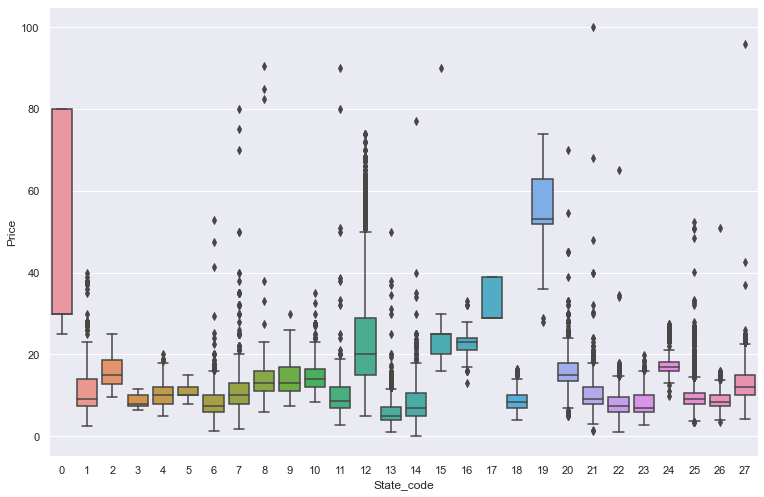

In [14]:
sns.boxplot(x='State_code',y='Price',data=data)

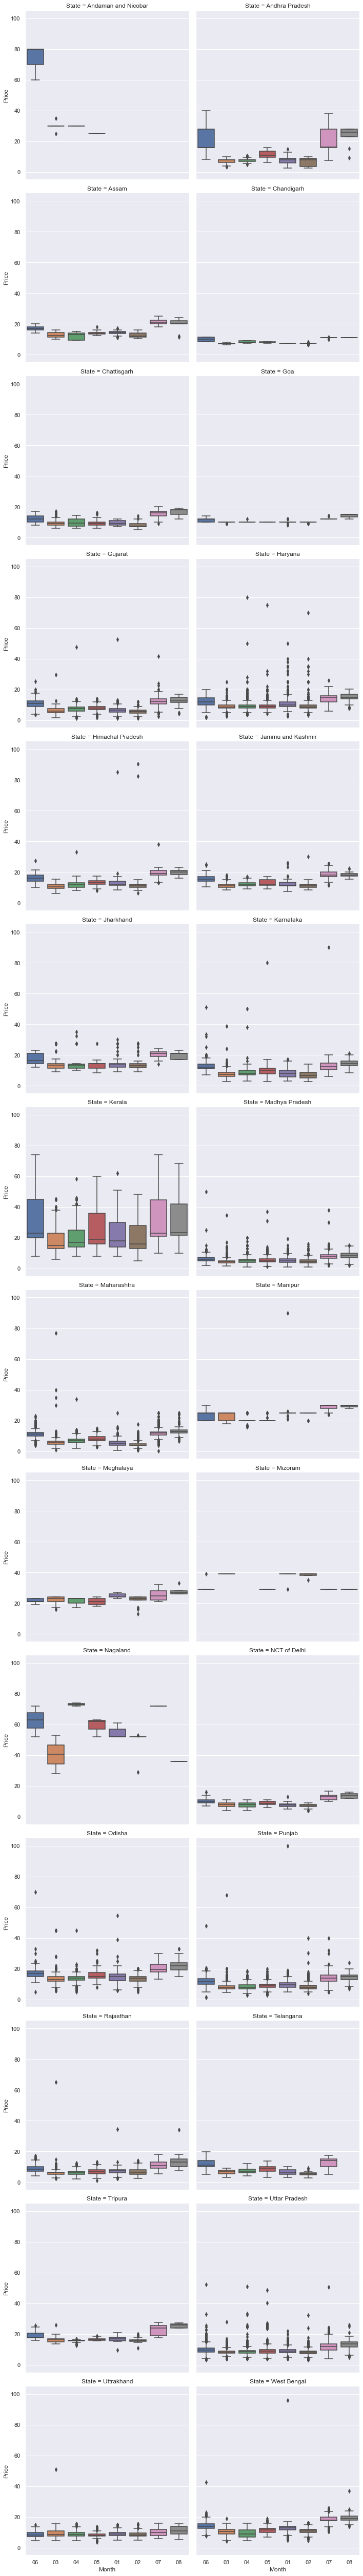

In [15]:
sns.catplot(x='Month',y='Price',col='State',col_wrap=2,data=dataset,kind='box')


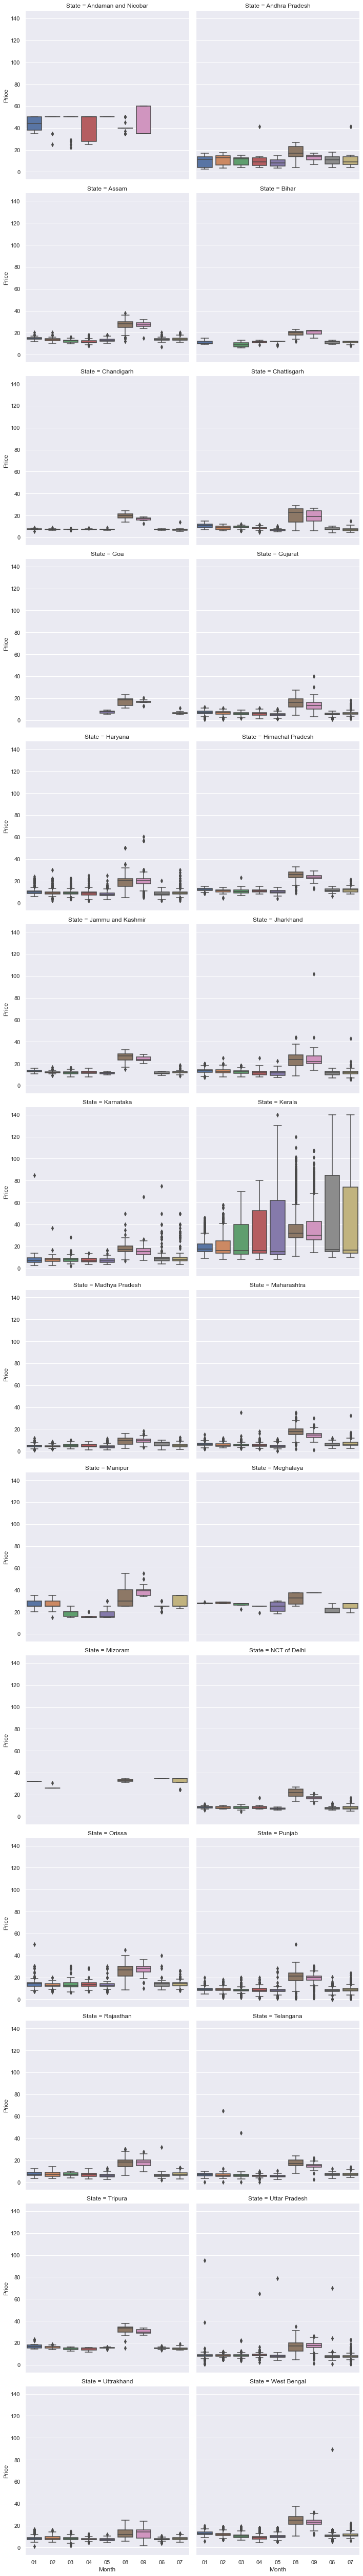

In [16]:
sns.catplot(x='Month',y='Price',col='State',col_wrap=2,data=datasets,kind='box')

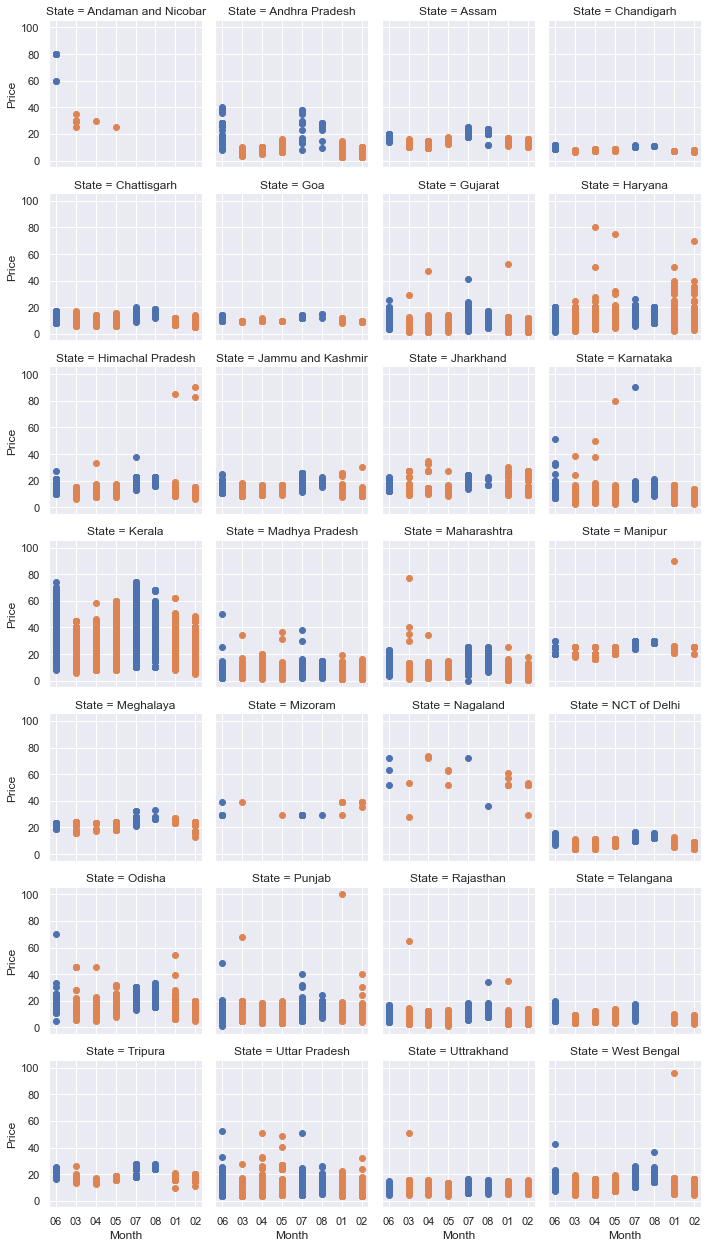

In [17]:
g = sns.FacetGrid(dataset,  col="State",hue="Harvesting Month" ,col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")


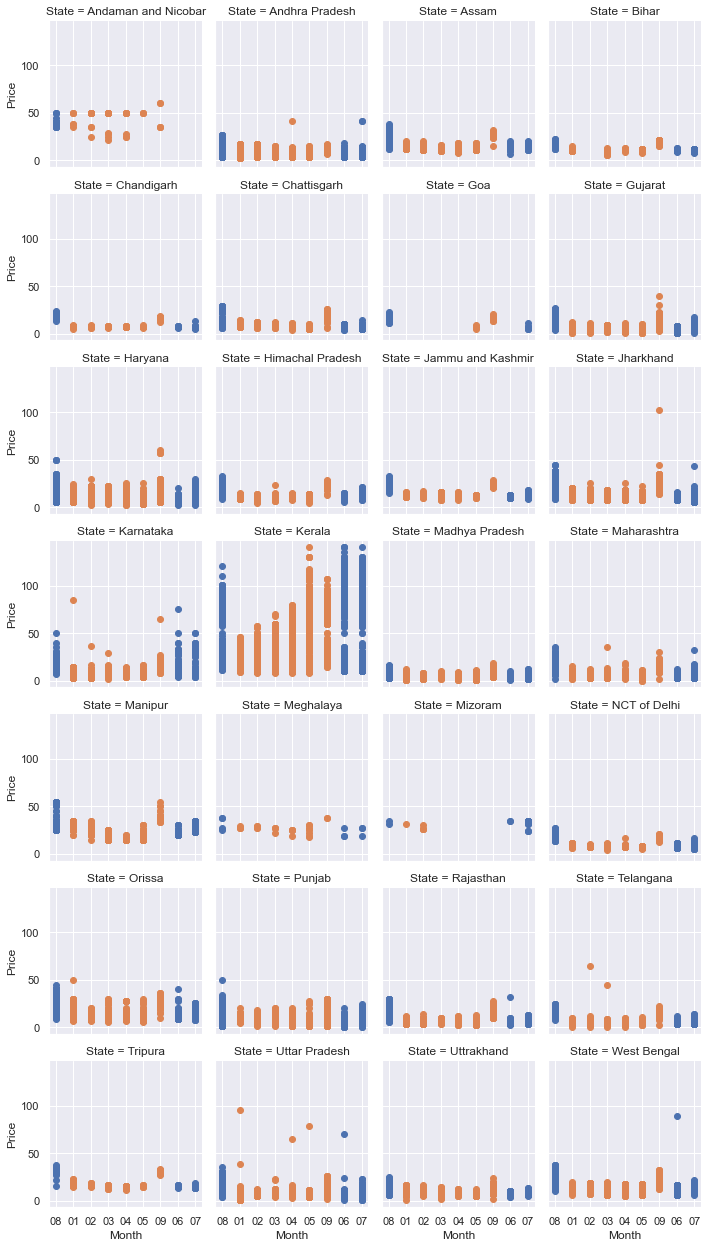

In [18]:
g = sns.FacetGrid(datasets,  col="State",hue="Harvesting Month", col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")

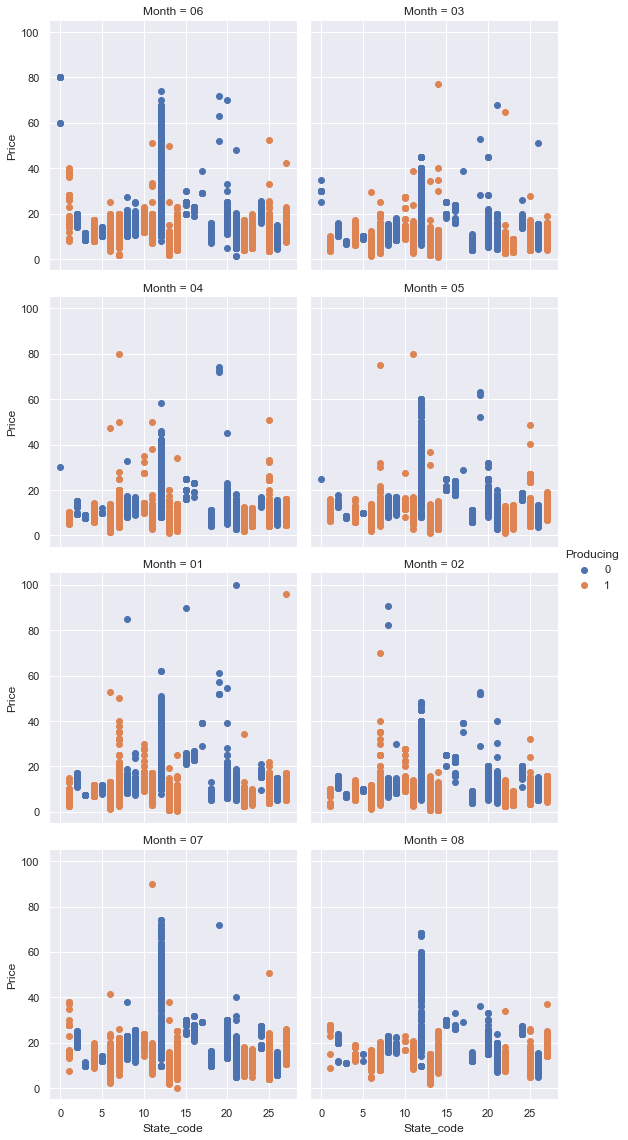

In [19]:

g = sns.FacetGrid(dataset,  col="Month",hue="Producing", col_wrap=2, height=4)
g.map(plt.scatter,"State_code","Price")
g.add_legend()

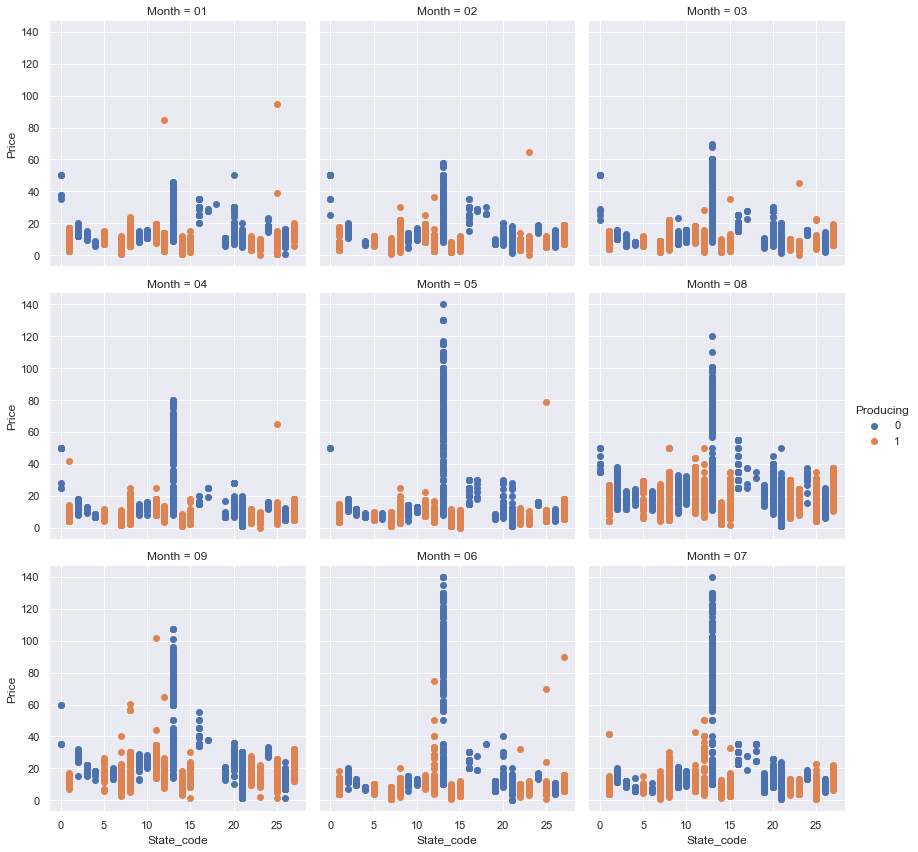

In [20]:
g = sns.FacetGrid(datasets,  col="Month",hue="Producing", col_wrap=3, height=4)
g.map(plt.scatter,"State_code","Price")
g.add_legend()

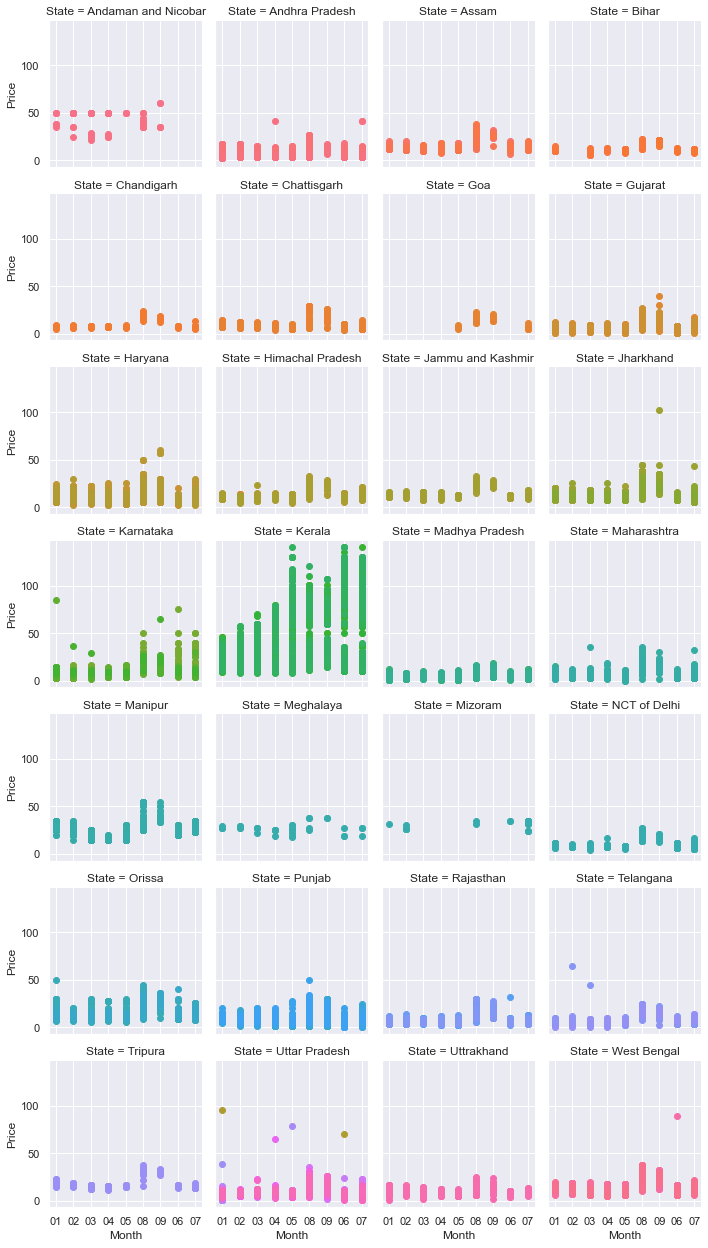

In [21]:
g = sns.FacetGrid(datasets,  col="State",hue="District", col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")


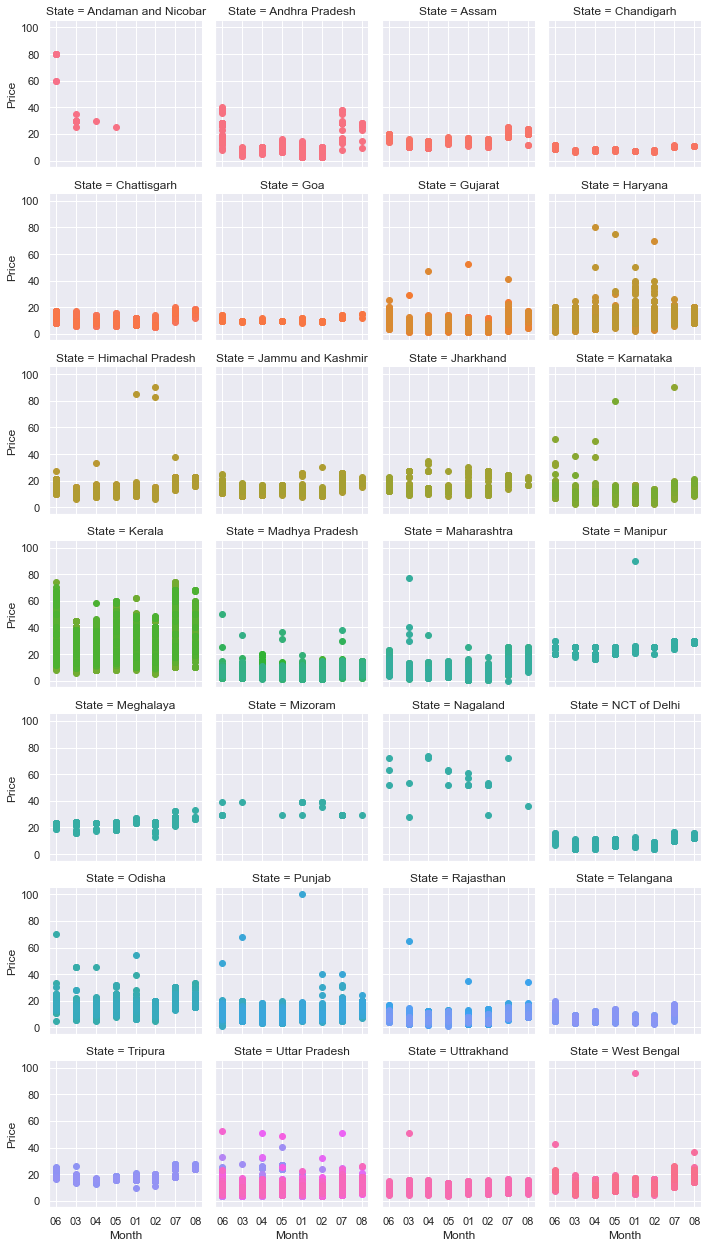

In [22]:
g = sns.FacetGrid(dataset,  col="State",hue="District", col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")


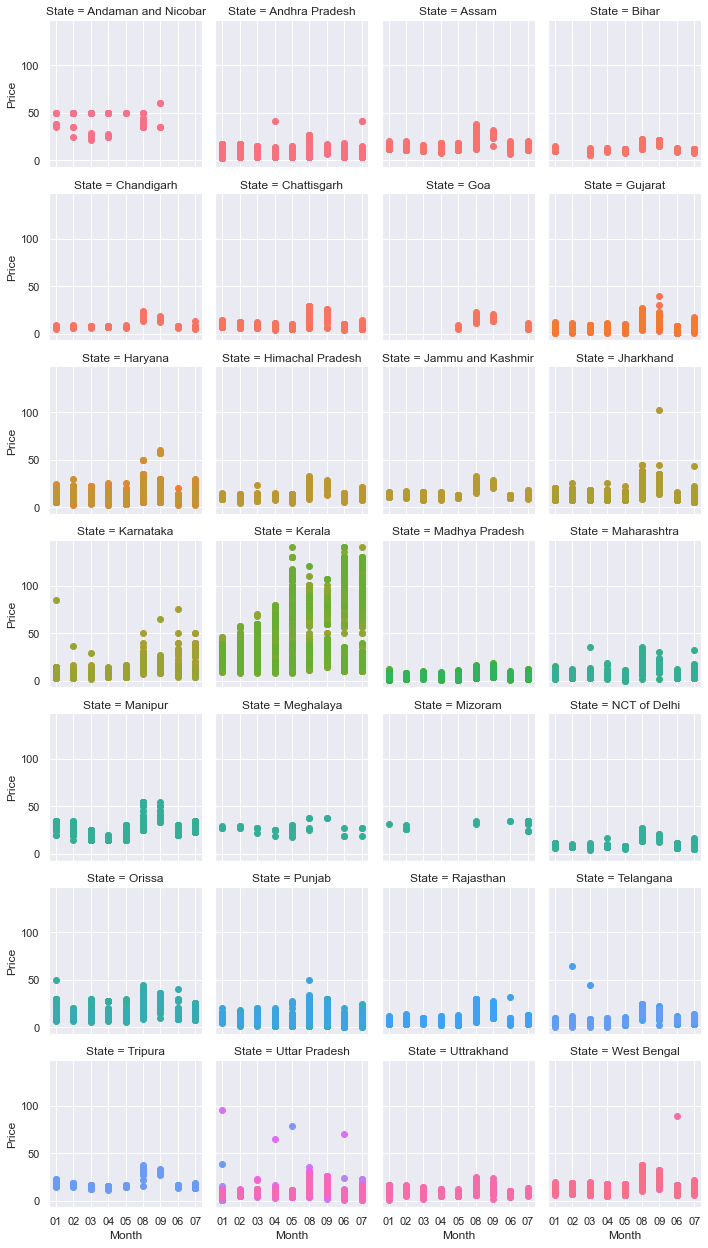

In [23]:
g = sns.FacetGrid(datasets,  col="State",hue="Market", col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")


In [24]:
s=dataset["Variety"].values
s=np.unique(s)
names = list(mcolors.CSS4_COLORS)
pal={}
for x in range(len(s)):
    new_key=s[x]
    new_val=names[x]
    pal[new_key]=new_val
pal

{'1st Sort': 'aliceblue',
 '2nd Sort': 'antiquewhite',
 'Bangalore-Samall': 'aqua',
 'Beelary-Red': 'aquamarine',
 'Bellary': 'azure',
 'Big': 'beige',
 'Bombay (U.P.)': 'bisque',
 'Dry F.A.Q.': 'black',
 'Hybrid': 'blanchedalmond',
 'Local': 'blue',
 'Medium': 'blueviolet',
 'Nasik': 'brown',
 'Onion': 'burlywood',
 'Other': 'cadetblue',
 'Pole': 'chartreuse',
 'Puna': 'chocolate',
 'Pusa-Red': 'coral',
 'Red': 'cornflowerblue',
 'Small': 'cornsilk',
 'Telagi': 'crimson',
 'White': 'cyan'}

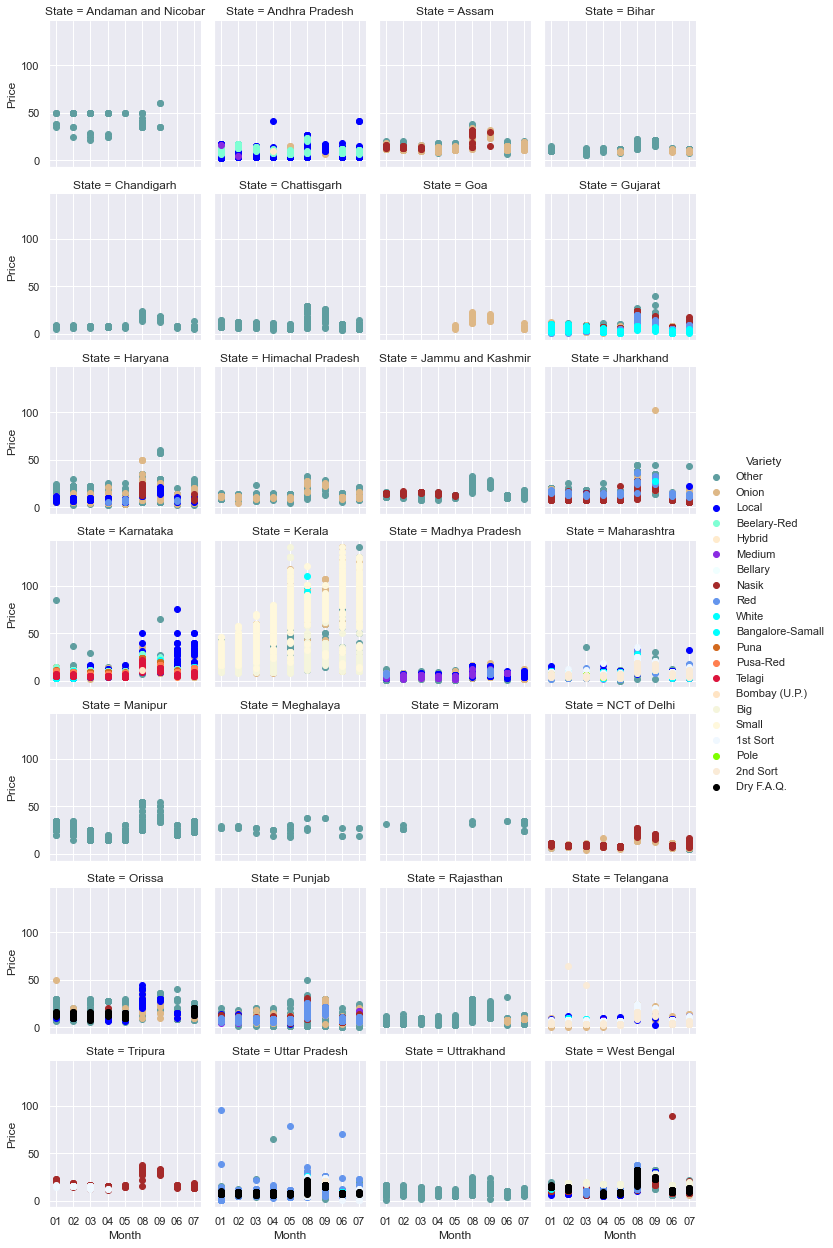

In [25]:
g = sns.FacetGrid(datasets,  col="State",hue="Variety",palette=pal, col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")
g.add_legend()

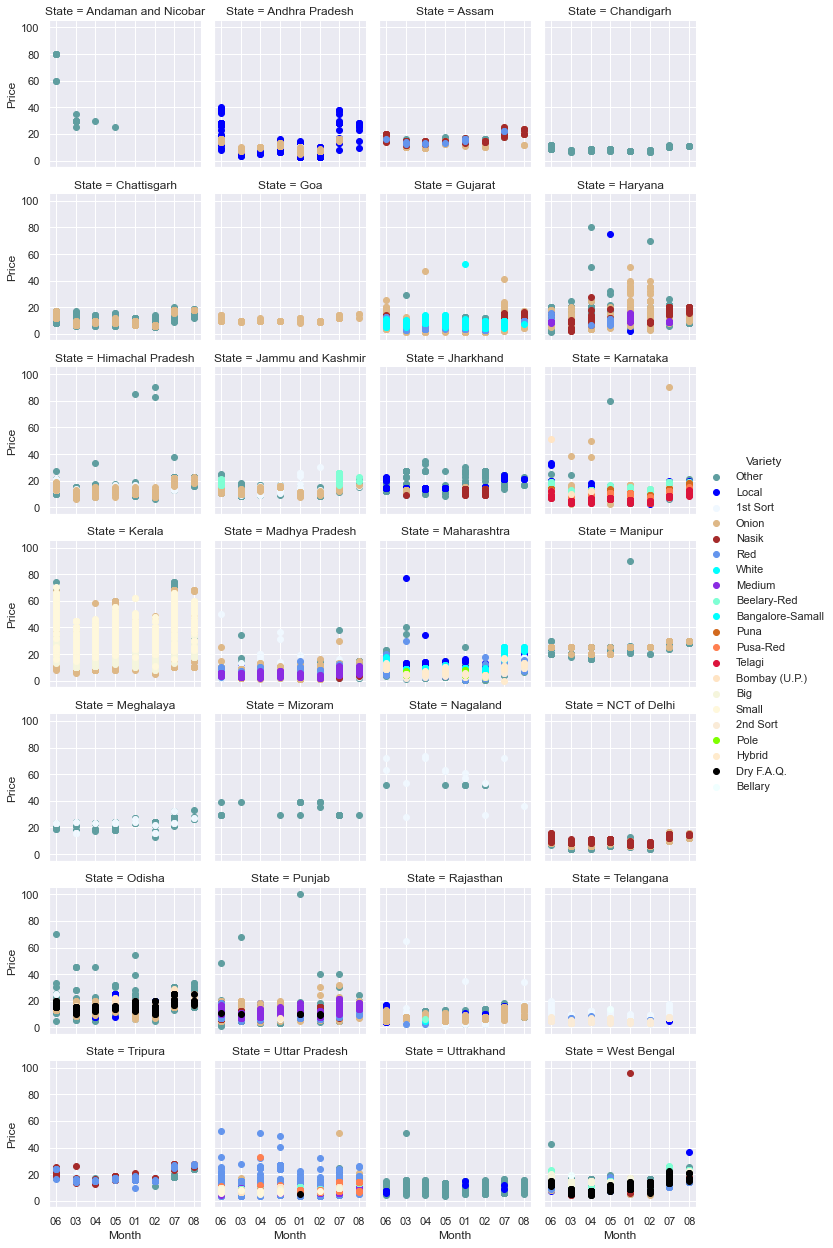

In [26]:
g = sns.FacetGrid(dataset,  col="State",hue="Variety",palette=pal, col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")
g.add_legend()

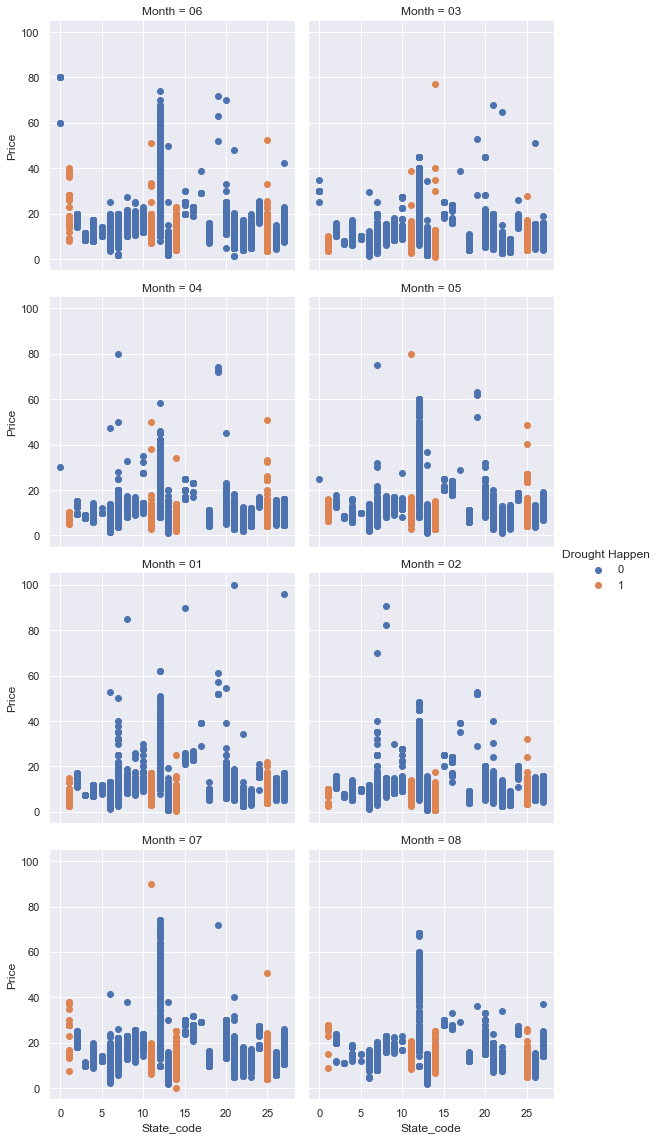

In [27]:

g = sns.FacetGrid(dataset,  col="Month",hue="Drought Happen", col_wrap=2, height=4)
g.map(plt.scatter,"State_code","Price")
g.add_legend()

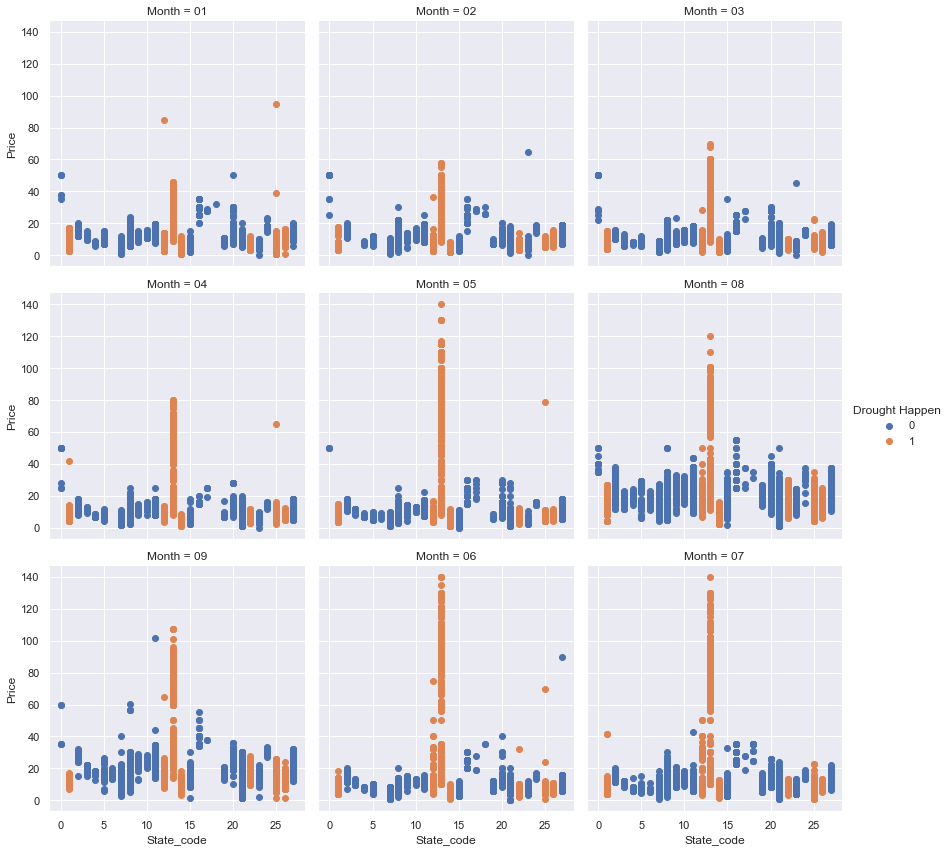

In [28]:
g = sns.FacetGrid(datasets,  col="Month",hue="Drought Happen", col_wrap=3, height=4)
g.map(plt.scatter,"State_code","Price")
g.add_legend()

In [29]:
X=dataset.values[:,[1,2,4,9,10,12,13,14]]
Y=dataset.values[:,11]

In [32]:
y

array([ 0,  0,  0, ..., 27, 27, 27])

In [31]:
dataset.head()

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month,Drought Happen
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,07/06/2019,6000,10000,8000.0,06,0,80.0,0,0,0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,11/06/2019,6000,10000,8000.0,06,0,80.0,0,0,0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,12/06/2019,6000,10000,8000.0,06,0,80.0,0,0,0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13/06/2019,6000,10000,8000.0,06,0,80.0,0,0,0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,14/06/2019,4000,8000,6000.0,06,0,60.0,0,0,0
